In [16]:
import random
import copy
from random import randint
import matplotlib.pyplot as plt
import openpyxl
from openpyxl import Workbook
from openpyxl.chart import LineChart, Reference
import numpy as np

#export to json

In [25]:
genomesize = 100
RNAcharacters = 'UGCA'
#mutationProb = 2
randomIndividuals = []

class individual:
  def __init__(self, generation):       #constructor - constructs a new individual object
    self.generation = generation
    self.fitness = 0
    self.genome = []  #going to be an array of values eventually so define an empty array to begin
    for i in range(0,genomesize):
      self.genome.append(random.choice(RNAcharacters))  #pulls elements from DNAcharacter string
    self.calcFitness()
    #self.color = (randint(0,255), randint(0,255), randint(0,255))
  
  def print(self):
    for c in self.genome:
      print(c, end = "")
    print(" ")
    #print(self.color)
    print("fitness:" + str(self.fitness))

    #plt.plot(self.fitness)
    #print(type(self.genome))
    
  def fillArr(self, a):
    a.append(self.fitness)
    #print(a)
  
  def calcFitness(self):    
    size = len(self.genome) - 2
    self.fitness = 0
    for c in range(0, size, 4):
      if (self.genome[c] == 'C' and self.genome[c+1] == 'A' and self.genome[c+2] == 'U') or (self.genome[c] == 'C' and self.genome[c+1] == 'A' and self.genome[c+2] == 'C') :
        #print("His")
        self.fitness += 8
      elif (self.genome[c] == 'U' and self.genome[c+1] == 'U' and self.genome[c+2] == 'A') or (self.genome[c] == 'U' and self.genome[c+1] == 'U' and self.genome[c+2] == 'G') or (self.genome[c] == 'C' and self.genome[c+1] == 'U' and self.genome[c+2] == 'U') or (self.genome[c] == 'C' and self.genome[c+1] == 'U' and self.genome[c+2] == 'C')  or (self.genome[c] == 'C' and self.genome[c+1] == 'U' and self.genome[c+2] == 'A') or (self.genome[c] == 'C' and self.genome[c+1] == 'U' and self.genome[c+2] == 'G') :
        #print("Leu")
        self.fitness += 8
      elif (self.genome[c] == 'A' and self.genome[c+1] == 'A' and self.genome[c+2] == 'A') or (self.genome[c] == 'A' and self.genome[c+1] == 'A' and self.genome[c+2] == 'G') :
        #print("Lys")
        self.fitness += 8
      elif (self.genome[c] == 'A' and self.genome[c+1] == 'U' and self.genome[c+2] == 'G'):
        #print("Met")
        self.fitness += 10
      elif (self.genome[c] == 'A' and self.genome[c+1] == 'U' and self.genome[c+2] == 'U') or (self.genome[c] == 'A' and self.genome[c+1] == 'U' and self.genome[c+2] == 'C') or (self.genome[c] == 'A' and self.genome[c+1] == 'U' and self.genome[c+2] == 'A') :
        #print("Iso")
        self.fitness += 8
      elif (self.genome[c] == 'U' and self.genome[c+1] == 'U' and self.genome[c+2] == 'U') or (self.genome[c] == 'U' and self.genome[c+1] == 'U' and self.genome[c+2] == 'C') :
        #print("Phe")
        self.fitness += 8
      elif (self.genome[c] == 'A' and self.genome[c+1] == 'C' and self.genome[c+2] == 'U') or (self.genome[c] == 'A' and self.genome[c+1] == 'C' and self.genome[c+2] == 'C') or (self.genome[c] == 'A' and self.genome[c+1] == 'C' and self.genome[c+2] == 'A') or (self.genome[c] == 'A' and self.genome[c+1] == 'A' and self.genome[c+2] == 'G'):
        #print("Thr")
        self.fitness += 8
      elif (self.genome[c] == 'U' and self.genome[c+1] == 'G' and self.genome[c+2] == 'G'):
        #print("Trp")
        self.fitness += 8
      elif (self.genome[c] == 'G' and self.genome[c+1] == 'U' and self.genome[c+2] == 'U') or (self.genome[c] == 'G' and self.genome[c+1] == 'U' and self.genome[c+2] == 'C') or (self.genome[c] == 'G' and self.genome[c+1] == 'U' and self.genome[c+2] == 'A') or (self.genome[c] == 'G' and self.genome[c+1] == 'U' and self.genome[c+2] == 'G'):
        #print("Val")
        self.fitness += 8
      else:
        self.fitness += 0

    #for c in range(0, size):
      #if self.genome[c] == 'A':
        #self.fitness += 1

  def mutation(self, mutationProb):
    for i in range(0, genomesize):
      if(random.uniform(0,100) < mutationProb):
        self.genome[i] = random.choice(RNAcharacters)
    self.calcFitness()

  def copy(self, source):       #CALL = i2.copy(i1)
    self.fitness = source.fitness
    for i in range(0, genomesize):
      self.genome[i] = source.genome[i]
    self.generation = source.generation
    
  def __str__(self):
    output = ""
    for c in self.genome:
      output = output + c
    output += " "
    output += "fitness: "
    output += str(self.fitness)
    output += " "
    output += "gen: "
    output += str(self.generation)
    return output

popsize = 22
class population:
  def __init__(self, parent = None):       #constructor - constructs a new population object
    #print("Creating a new population") 
    self.current_gen = 0
    self.avgFitness = 0
    self.the_pop = []  
    if parent is None:
      for i in range(0, popsize):
        self.the_pop.append(individual(self.current_gen))  #pulls elements from DNAcharacter string
    else:
      for i in range(0, popsize):
        i1 = individual(self.current_gen)
        i1.copy(parent)
        self.the_pop.append(i1)

  def calcStats(self):
    self.avg_fitness = 0
    for i in self.the_pop:
      self.avg_fitness += i.fitness
    self.avg_fitness /= popsize

  def generational(self, n, t):
    self.current_gen += 1
    if self.current_gen % 3 == 1:
      randomIndividuals.append(copy.deepcopy((self.the_pop[randint(0,popsize-1)])))
    tempPop = population()
    for i in range(0, popsize, 2):    #needs an even pop size
      parent = self.tournament(t) #select, returns an index
      parent2 = self.tournament(t)
      tempPop.the_pop[i].copy(self.the_pop[parent])    
      tempPop.the_pop[i+1].copy(self.the_pop[parent2])
      tempPop.crossover(i, i+1)
      tempPop.the_pop[i+1].mutation(n)
      tempPop.the_pop[i].mutation(n)
      tempPop.the_pop[i].generation = self.current_gen
      tempPop.the_pop[i+1].generation = self.current_gen
    #select individuals using tournament()
    #mutate them?
    #put into new/temp population 

    #when new/temp population is full, copy new/temp pop back into the_pop
    for i in range(0, popsize):
      self.the_pop[i].copy(tempPop.the_pop[i])
    self.calcStats()

  # def onepoint_crossover(self,p1,p2):   #pick random point and cross anything beyond that point
  #   crossover_point = random.randint(0, genomesize)
  #   for j in range(crossover_point, genomesize):
  #     temp = self.the_pop[p1].genome[j] #remeber parent 1's character
  #     self.the_pop[p1].genome[j] = self.the_pop[p2].genome[j]
  #     self.the_pop[p2].genome[j] = temp


  def crossover(self,p1,p2):    #uniform crossover- 10% possibility of swaping any two characters
    for j in range(0, genomesize):
      if random.randint(0, 100) < 10:       #uniform crossover
          #print(j)
          temp = self.the_pop[p1].genome[j] #remeber parent 1's character
          self.the_pop[p1].genome[j] = self.the_pop[p2].genome[j]
          self.the_pop[p2].genome[j] = temp
          #self.the_pop[p1].genome[j],self.the_pop[p2].genome[j],self.the_pop[p1].genome
          #a,b = b,a
  def tournament(self, t):
    tourn_size = t
    best_so_far = random.randint(0, popsize-1)
    best_fitness = self.the_pop[best_so_far].fitness
    #print(best_so_far)
    for i in range(0, tourn_size - 1):
      current = random.randint(0, popsize-1)
      current_fit = self.the_pop[current].fitness
      #print(current)
      if(current_fit > best_fitness):
        best_so_far = current
        best_fitness = current_fit
    return best_so_far

0.2


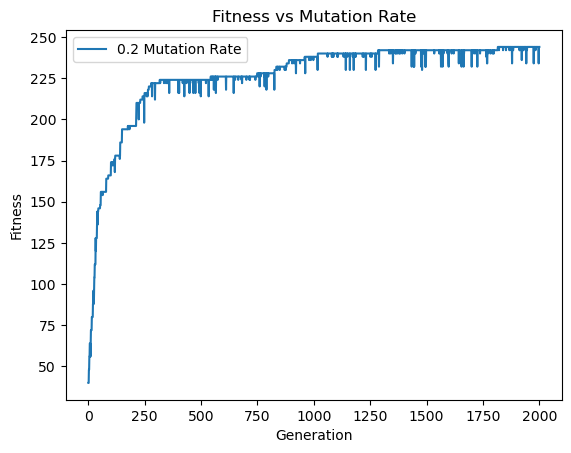

In [26]:
p = population(individual(0))
n = 0.2
t = 5
x  = []
numGens = 2000

for i in range(1, numGens+1):
  x.append(i)

#for i in range(0, popsize):
  #p.the_pop[i].print()
  #print("hi")

#for l in range(3):
a = []
print(n)
for i in range(0, numGens):
  p.generational(n, t)
  #p.the_pop[0].print()
  p.the_pop[0].fillArr(a)


plt.plot(x, a, label="0.2 Mutation Rate")


plt.plot

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness vs Mutation Rate")
plt.legend()
plt.show()

In [27]:
# print(randomIndividuals)
for ind in randomIndividuals:
    print(ind)

GAUAGGGACAACUUGCCCGCGGCGAACUUAUAUCUUCCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCGGAGUGGGGGC fitness: 40 gen: 0
GAUAGGGACUACUUGCCCGCGGCGAACUUAUAUCUUCCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCGGAGUGGGGGC fitness: 48 gen: 3
GAUAGGGACUACUUGCCGGCGGCGAACUCAUAUCUUCCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCGGAGUGGGGGC fitness: 56 gen: 6
GAUAGGGACUACUUGCCCGCGGCGAACUCAUAUCUUCCUUAAAGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCGGAGUGGGGUC fitness: 64 gen: 9
GAUAGGGACUACUUGCCCGCGGCGACCUCAUAUCUUGCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCUGAGUGGGGGC fitness: 72 gen: 12
GAUAGGGACUACUUGCCCGCGGCGACCUCAUAUCUUGCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAUAACUUGCUUCCCUGAGUGGGGGC fitness: 72 gen: 15
GAUAGGGACUACUUGCCCGCGGCGACCUCAUAUCUUGCUUAAUGUACAUCUAUAACUAGAGGCGCGGCCCAUGUAAAAACUUGCUUCCCUGAGUGGGGGC fitness: 80 gen: 18
GAUAGGGACUACUUGCCCGCGGCGACCUCAUAUCUUGCUUAAUGUACAUCUUUAACUAGAGGCGCGGCCCAUGUAAAAACUUGCUUCCCUGAGUGGGUGC fitness: 88 gen: 21
GAUAGGGACUACUUGCCCGCGGCGACCUCAUAUUUU

In [ ]:
import json
outputData = {}

for ind in randomIndividuals:
    outputData.update({str(ind.generation): [ind.genome, ind.fitness]})

json_object = json.dumps(outputData, indent=4)

with open("testData.json", "w") as outfile:
    outfile.write(json_object)